# **Open Pub Application**

## **Case Study**

Let’s assume you are on a vacation in the United Kingdom with your friends. For fun, you decided to go to the Pubs nearby for some drinks. Google Map is down because of some issues. 

While searching the internet, you came across https://www.getthedata.com/open-pubs. On this website, you found all the pub locations (Specifically Latitude and Longitude info). In order to impress your friends, you decided to create a web application with the data available in your hand.


## **Data Description**

**fsa_id** : Food Standard Agency's ID for this pub.

**name** : Name of the pub.

**address** : Address fields separated by commas.

**postcode** : Postcode of the pub.

**easting**	: Easting coordinate of the pub's location.

**northing** : Northing coordinate of the pub's location.

**latitude** : Latitude coordinate of the pub's location.

**longitude** : Longitude coordinate of the pub's location.

**local_authority** : Local authority this pub falls under.

In [ ]:
#!pip install basemap

In [2]:
# Import Libraries

import pandas as pd
import numpy as np

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

## **Read the Data**

In [3]:
# Read the data

df = pd.read_csv('/content/open_pubs.csv')

df.head()

,22,Anchor Inn,"Upper Street, Stratford St Mary, COLCHESTER",CO7 6LW,604749,234404,51.970379,0.979340,Babergh
0,36,Ark Bar Restaurant,"Ark Bar And Restaurant, Cattawade Street, Bran...",CO11 1RH,610194,233329,51.958698,1.057832,Babergh
1,74,Black Boy,"The Lady Elizabeth, 7 Market Hill, SUDBURY, Su...",CO10 2EA,587334,241316,52.038595,0.729915,Babergh
2,75,Black Horse,"Lower Street, Stratford St Mary, COLCHESTER",CO7 6JS,622675,-5527598,\N,\N,Babergh
3,76,Black Lion,"Lion Road, Glemsford, SUDBURY",CO10 7RF,622675,-5527598,\N,\N,Babergh
4,97,Brewers Arms,"The Brewers Arms, Bower House Tye, Polstead, C...",CO6 5BZ,598743,240655,52.028694,0.895650,Babergh


In [4]:
# Define column names as a list of strings

column_names = ['fsa_id', 'name', 'address', 'postcode', 'easting', 'northing','latitude', 'longitude', 'local_authority']

# Assign column names to DataFrame
df.columns = column_names

df.head()

,fsa_id,name,address,postcode,easting,northing,latitude,longitude,local_authority
0,36,Ark Bar Restaurant,"Ark Bar And Restaurant, Cattawade Street, Bran...",CO11 1RH,610194,233329,51.958698,1.057832,Babergh
1,74,Black Boy,"The Lady Elizabeth, 7 Market Hill, SUDBURY, Su...",CO10 2EA,587334,241316,52.038595,0.729915,Babergh
2,75,Black Horse,"Lower Street, Stratford St Mary, COLCHESTER",CO7 6JS,622675,-5527598,\N,\N,Babergh
3,76,Black Lion,"Lion Road, Glemsford, SUDBURY",CO10 7RF,622675,-5527598,\N,\N,Babergh
4,97,Brewers Arms,"The Brewers Arms, Bower House Tye, Polstead, C...",CO6 5BZ,598743,240655,52.028694,0.895650,Babergh


In [5]:
df.shape

(51330, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51330 entries, 0 to 51329
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   fsa_id           51330 non-null  int64 
 1   name             51330 non-null  object
 2   address          51330 non-null  object
 3   postcode         51330 non-null  object
 4   easting          51330 non-null  int64 
 5   northing         51330 non-null  int64 
 6   latitude         51330 non-null  object
 7   longitude        51330 non-null  object
 8   local_authority  51330 non-null  object
dtypes: int64(3), object(6)
memory usage: 3.5+ MB


## **Cleaning**

In [7]:
# Checking for null values

null = []
for i in df:
    value = df[i].isin(['\\N']).sum()
    null.append([f'{i} : {value}'])
print(*null, sep = "\n")

['fsa_id : 0']
['name : 0']
['address : 0']
['postcode : 0']
['easting : 0']
['northing : 0']
['latitude : 767']
['longitude : 767']
['local_authority : 0']


In [8]:
# Drop null values

df.replace('\\N', np.nan, inplace=True)
df.dropna(inplace=True)

In [9]:
# Check duplicate values
 
df.duplicated().sum()

0

In [10]:
df['latitude'] = df['latitude'].astype(float)
df['longitude'] = df['longitude'].astype(float)

In [11]:
df = df.drop(columns = ['fsa_id', 'easting', 'northing'], axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50563 entries, 0 to 51329
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             50563 non-null  object 
 1   address          50563 non-null  object 
 2   postcode         50563 non-null  object 
 3   latitude         50563 non-null  float64
 4   longitude        50563 non-null  float64
 5   local_authority  50563 non-null  object 
dtypes: float64(2), object(4)
memory usage: 2.7+ MB


In [13]:
df.describe()

,latitude,longitude
count,50563.000000,50563.000000
mean,52.718772,-1.618317
std,1.497436,1.415450
min,49.892485,-7.384525
25%,51.512366,-2.590561
50%,52.502652,-1.584745
75%,53.585197,-0.449987
max,60.764969,1.757763


In [14]:
df.describe(include='object')

,name,address,postcode,local_authority
count,50563,50563,50563,50563
unique,35809,49290,45230,360
top,The Red Lion,"Uttoxeter Racecourse, Wood Lane, Uttoxeter",GU24 0NY,County Durham
freq,193,10,12,680


## **Map of the Pubs**

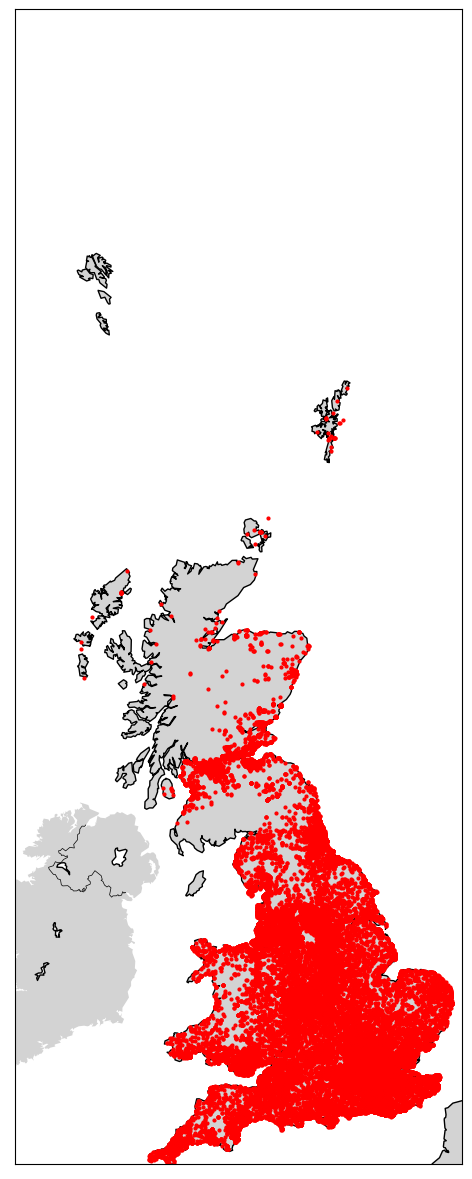

In [15]:
fig = plt.figure(figsize=(12, 15))

# Define map boundaries
lat_min, lat_max = 50.0, 65.0
lon_min, lon_max = -9.0, 2.0

# Create Basemap object
m = Basemap(projection='merc', resolution='i',
            llcrnrlat=lat_min, urcrnrlat=lat_max,
            llcrnrlon=lon_min, urcrnrlon=lon_max)

# Draw map features
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgray', lake_color='white')

# Plot pub locations on the map
x, y = m(df['longitude'].values, df['latitude'].values)
m.plot(x, y, 'o', markersize=2, color='red')

# Show the map
plt.show()

In [17]:
df.to_csv('data.csv', index = False)